In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, sys, numpy as np
import argparse
from time import time
from tqdm import tqdm
import tensorflow 
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision.transforms as transforms
from PIL import Image
import keras
from keras.layers import TimeDistributed as td
from keras.layers import Conv2D, Flatten, Dense, ZeroPadding2D, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization, Reshape
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps
import random

In [4]:
var=1000
mean=0
def AWGN(var):
  #Adding gaussian noise to each channel
  gaussian_noiser = np.random.normal(mean,var**0.5,(w,h))
  gaussian_noiseb = np.random.normal(mean,var**0.5,(w,h))
  gaussian_noiseg = np.random.normal(mean,var**0.5,(w,h))

  #The noise added overflows at 0 and 255, leading to very bright or very dark dots. To avoid this, we clipped the image after noise was added.
  noisyr = np.clip(img2[:,:,0] + gaussian_noiser,0,255)
  noisyb = np.clip(img2[:,:,1] + gaussian_noiseb,0,255)
  noisyg = np.clip(img2[:,:,2] + gaussian_noiseg,0,255)

  #Saving the noisy channels to a new image 
  for i in range(w):
    for j in range(h):
        out[i,j,0]=noisyr[i,j]
        out[i,j,1]=noisyb[i,j]
        out[i,j,2]=noisyg[i,j]

  return out

In [ ]:
dirlist=os.listdir('/content/drive/MyDrive/cv/To_noisy')
for image in dirlist:
  img=cv2.imread('/content/drive/MyDrive/cv/To_noisy/'+image)
  size = (300,300)
  img2 = cv2.resize(img, size)
  out=img2.copy()
  w=img2.shape[0]
  h=img2.shape[1]
  cv2.imwrite('/content/drive/MyDrive/cv/small_noise/'+image,AWGN(var))

In [5]:
dirlist=os.listdir('/content/drive/MyDrive/cv/small_noise')
xim=[]
yim=[]
original=[]
for image in dirlist:
  small=cv2.imread('/content/drive/MyDrive/cv/small_noise/'+image)
  original.append(small)
  one=small[:100,:100,:]
  two=small[:100,100:200,:]
  three=small[:100,200:300,:]
  four=small[100:200,:100,:]
  five=small[100:200,100:200,:]
  six=small[100:200,200:300,:]
  seven=small[200:300,:100,:]
  eight=small[200:300,100:200,:]
  nine=small[200:300,200:300,:]
  x=[]
  y=[1,2,3,4,5,6,7,8,9]
  random.shuffle(y)
  for i in range(9):
    if (y[i]==1):
      x.append(one)
    if (y[i]==2):
      x.append(two)
    if (y[i]==3):
      x.append(three)
    if (y[i]==4):
      x.append(four)
    if (y[i]==5):
      x.append(five)
    if (y[i]==6):
      x.append(six)
    if (y[i]==7):
      x.append(seven)
    if (y[i]==8):
      x.append(eight)
    if (y[i]==9):
      x.append(nine)
  xar=np.array(x)
  yar=np.array(y)
  xim.append(xar)
  yim.append(yar)
og=np.array(original)
xfin=np.array(xim)
yfin=np.array(yim)

In [6]:
print(xfin.shape)
print(yfin.shape)
print(og.shape)
trainor=og[:800,:,:,:]
valor=og[800:900,:,:,:]
testor=og[900:1000,:,:,:]
Xtrain=xfin[:800,:,:,:,:]
Ytrain=yfin[:800,:]
Xval=xfin[800:900,:,:,:,:]
Yval=yfin[800:900,:]
Xtest=xfin[900:1000,:,:,:,:]
Ytest=yfin[900:1000,:]

(1000, 9, 100, 100, 3)
(1000, 9)
(1000, 300, 300, 3)


In [7]:
print(Xval.shape)

(100, 9, 100, 100, 3)


In [8]:
model = keras.models.Sequential()
model.add(td(ZeroPadding2D(2), input_shape=(9, 100, 100, 3)))
model.add(td(Conv2D(50, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(MaxPooling2D()))
model.add(td(Conv2D(100, kernel_size=(5,5), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(td(Conv2D(100, kernel_size=(3,3), padding='same', activation='relu', strides=2)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(td(Conv2D(200, kernel_size=(3,3), padding='same', activation='relu', strides=1)))
model.add(td(BatchNormalization()))
model.add(td(Dropout(0.3)))
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(9))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 9, 104, 104, 3)   0         
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 9, 52, 52, 50)    3800      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 9, 52, 52, 50)    200       
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 9, 26, 26, 50)    0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 9, 13, 13, 100)   1

In [9]:
model.compile(loss='MeanSquaredError', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [10]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [11]:
history= model.fit(Xtrain, Ytrain, epochs=800, batch_size=10, verbose=1,validation_data=(Xval,Yval),callbacks=[callback])


Epoch 1/800
80/80 [==============================] - 18s 41ms/step - loss: 30.4159 - accuracy: 0.2025 - val_loss: 30.5591 - val_accuracy: 0.2400
Epoch 2/800
80/80 [==============================] - 3s 37ms/step - loss: 30.2585 - accuracy: 0.2700 - val_loss: 30.3228 - val_accuracy: 0.2700
Epoch 3/800
80/80 [==============================] - 3s 36ms/step - loss: 30.2279 - accuracy: 0.2675 - val_loss: 30.2520 - val_accuracy: 0.2400
Epoch 4/800
80/80 [==============================] - 3s 34ms/step - loss: 30.1761 - accuracy: 0.3325 - val_loss: 30.2213 - val_accuracy: 0.2900
Epoch 5/800
80/80 [==============================] - 3s 34ms/step - loss: 30.1385 - accuracy: 0.3413 - val_loss: 30.1805 - val_accuracy: 0.3000
Epoch 6/800
80/80 [==============================] - 3s 35ms/step - loss: 30.1303 - accuracy: 0.3675 - val_loss: 30.2096 - val_accuracy: 0.2500
Epoch 7/800
80/80 [==============================] - 3s 35ms/step - loss: 30.1175 - accuracy: 0.3725 - val_loss: 30.2205 - val_accuracy

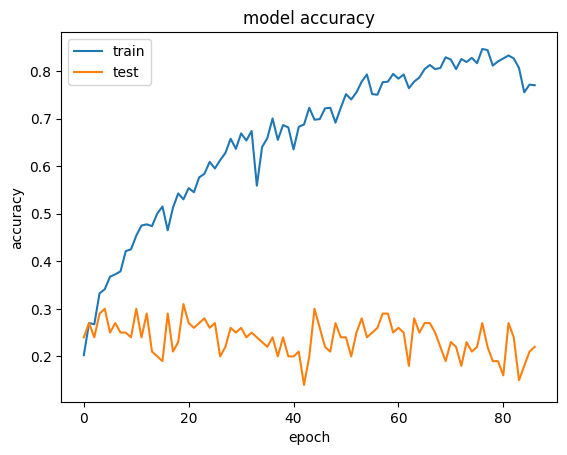

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
_, accuracy = model.evaluate(Xtest, Ytest)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 1s 36ms/step - loss: 30.1951 - accuracy: 0.3100
Accuracy: 31.00


(100, 9, 100, 100, 3)
(1, 9, 100, 100, 3)
1/1 [==============================] - 0s 19ms/step
[8, 5, 7, 6, 2, 4, 9, 1, 3]
[6, 1, 2, 5, 4, 9, 7, 3, 8]
Solved:


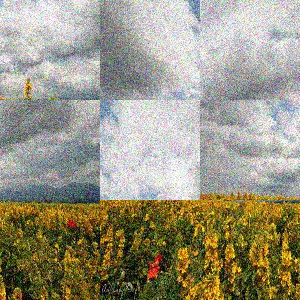

Original:


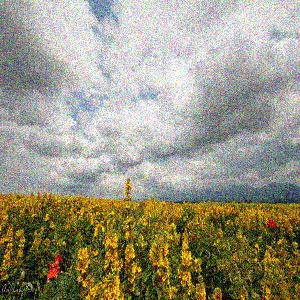

Shuffled


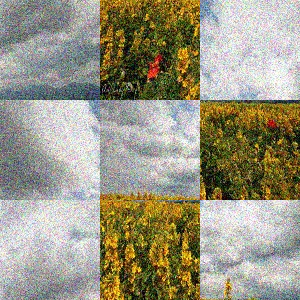

In [19]:
print(Xtest.shape)
X1=[Xtest[34,:,:,:,:]]
Xa=np.array(X1)
print(Xa.shape)
ytesting=model.predict(Xa)
sort_index = np.argsort(ytesting)
List = sort_index[0]
predicted=[]
Actual=[]
for elem in List:
  predicted.append(elem+1)
for elem in Ytest[0]:
  Actual.append(elem)
print(predicted)
print(Actual)
print('Solved:')
pre=np.zeros((300,300,3))
pre[:100,:100,:]=X1[0][predicted[0]-1]
pre[:100,100:200,:]=X1[0][predicted[1]-1]
pre[:100,200:300,:]=X1[0][predicted[2]-1]
pre[100:200,:100,:]=X1[0][predicted[3]-1]
pre[100:200,100:200,:]=X1[0][predicted[4]-1]
pre[100:200,200:300,:]=X1[0][predicted[5]-1]
pre[200:300,:100,:]=X1[0][predicted[6]-1]
pre[200:300,100:200,:]=X1[0][predicted[7]-1]
pre[200:300,200:300,:]=X1[0][predicted[8]-1]
cv2_imshow(pre)
print('Original:')
cv2_imshow(testor[34])
print('Shuffled')
shu=np.zeros((300,300,3))
shu[:100,:100,:]=X1[0][Actual[0]-1]
shu[:100,100:200,:]=X1[0][Actual[1]-1]
shu[:100,200:300,:]=X1[0][Actual[2]-1]
shu[100:200,:100,:]=X1[0][Actual[3]-1]
shu[100:200,100:200,:]=X1[0][Actual[4]-1]
shu[100:200,200:300,:]=X1[0][Actual[5]-1]
shu[200:300,:100,:]=X1[0][Actual[6]-1]
shu[200:300,100:200,:]=X1[0][Actual[7]-1]
shu[200:300,200:300,:]=X1[0][Actual[8]-1]
cv2_imshow(shu)

(100, 9, 100, 100, 3)
(1, 9, 100, 100, 3)
1/1 [==============================] - 0s 22ms/step
[8, 9, 5, 6, 1, 7, 2, 4, 3]
[6, 1, 2, 5, 4, 9, 7, 3, 8]
Solved:


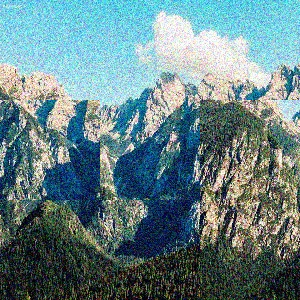

Original:


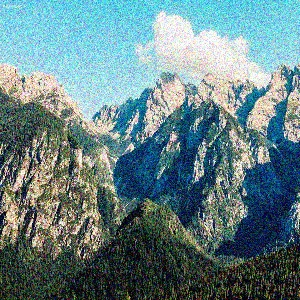

Shuffled


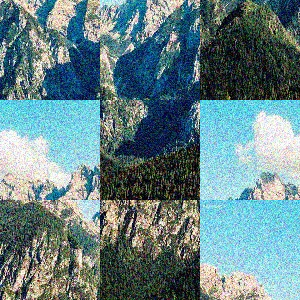

In [20]:
print(Xtest.shape)
X1=[Xtest[68,:,:,:,:]]
Xa=np.array(X1)
print(Xa.shape)
ytesting=model.predict(Xa)
sort_index = np.argsort(ytesting)
List = sort_index[0]
predicted=[]
Actual=[]
for elem in List:
  predicted.append(elem+1)
for elem in Ytest[0]:
  Actual.append(elem)
print(predicted)
print(Actual)
print('Solved:')
pre=np.zeros((300,300,3))
pre[:100,:100,:]=X1[0][predicted[0]-1]
pre[:100,100:200,:]=X1[0][predicted[1]-1]
pre[:100,200:300,:]=X1[0][predicted[2]-1]
pre[100:200,:100,:]=X1[0][predicted[3]-1]
pre[100:200,100:200,:]=X1[0][predicted[4]-1]
pre[100:200,200:300,:]=X1[0][predicted[5]-1]
pre[200:300,:100,:]=X1[0][predicted[6]-1]
pre[200:300,100:200,:]=X1[0][predicted[7]-1]
pre[200:300,200:300,:]=X1[0][predicted[8]-1]
cv2_imshow(pre)
print('Original:')
cv2_imshow(testor[68])
print('Shuffled')
shu=np.zeros((300,300,3))
shu[:100,:100,:]=X1[0][Actual[0]-1]
shu[:100,100:200,:]=X1[0][Actual[1]-1]
shu[:100,200:300,:]=X1[0][Actual[2]-1]
shu[100:200,:100,:]=X1[0][Actual[3]-1]
shu[100:200,100:200,:]=X1[0][Actual[4]-1]
shu[100:200,200:300,:]=X1[0][Actual[5]-1]
shu[200:300,:100,:]=X1[0][Actual[6]-1]
shu[200:300,100:200,:]=X1[0][Actual[7]-1]
shu[200:300,200:300,:]=X1[0][Actual[8]-1]
cv2_imshow(shu)